<a href="https://colab.research.google.com/github/alfisuryap/PengolahanCitraDanVisiKomputer/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 10: Global Thresholding**

Nama: Alfi Surya Pratama

NIM: 2141720075

Kelas: TI-3D

Mata Kuliah: Machine Learning

## **Praktikum**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.

    Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-10 berikut.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3.  Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di bawah.

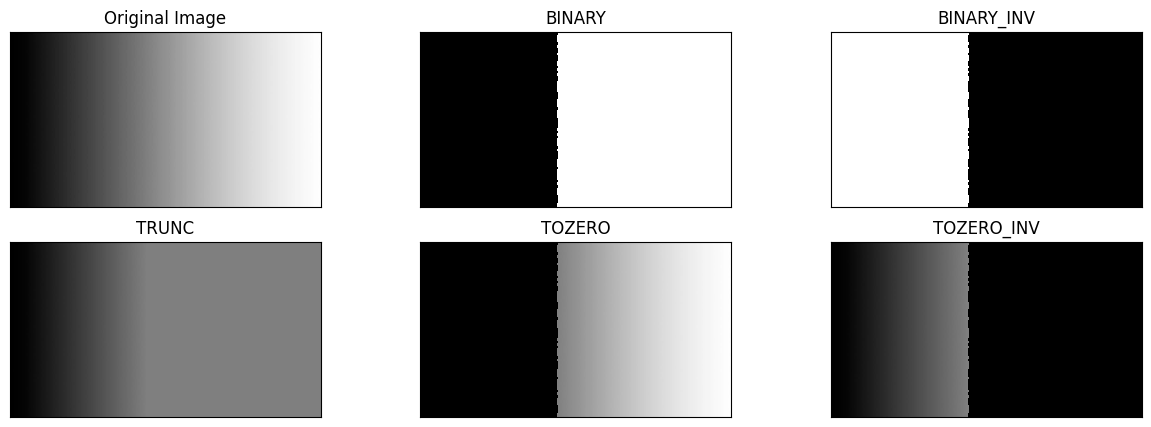

In [11]:
filename_1 = ('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 10/gradient.jpg')

# tanpa menggunakan library
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 127    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#2. Binary threshold inverse
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3[img_g>thresh] = thresh
#4. Threshold Tozero
thresh4[img_g<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

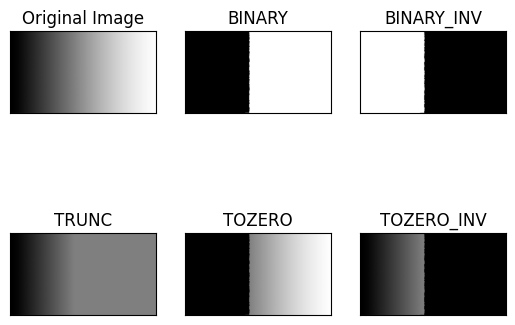

In [12]:
# menggunakan library
img_g = cv2.imread(filename_1)
ret,thresh1 = cv2.threshold(img_g,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_g,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_g,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_g,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_g,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image **ktp Riyanto.jpg** agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-13-bfb3ce862a58>:20: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


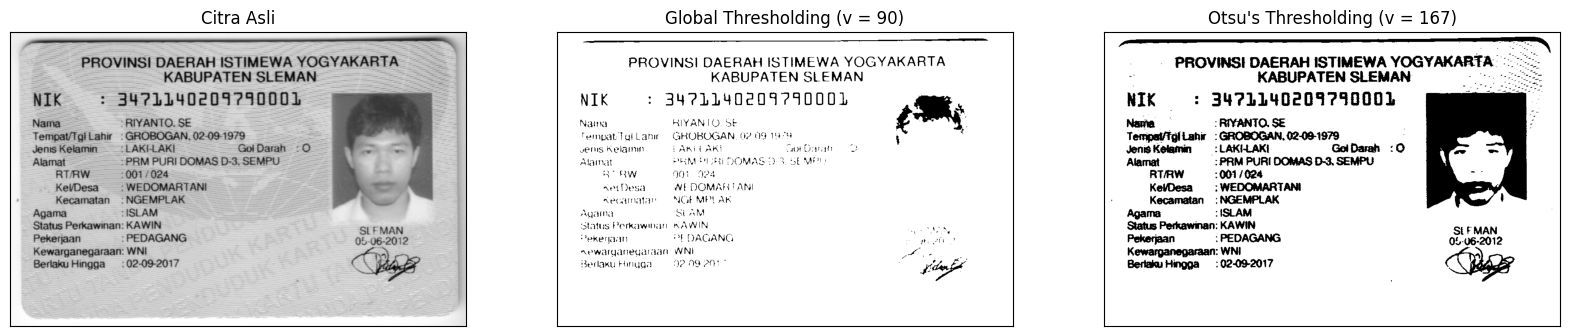

In [13]:
# tanpa menggunakan library
filename_2 = ('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 7/KTP_More/ktp.png')
img_lgs = cv2.imread(filename_2, 0)
blur = cv2.GaussianBlur(img_lgs, (5,5),0)
hist = cv2.calcHist([blur],[0],None,[256], [0,256])

hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0,255):
  wb += hist[i]
  wf = (img_lgs.shape[0]*img_lgs.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

# Set the desired threshold value (v = 167)
desired_threshold = 167

x = "Otsu's Thresholding (v = " + str(desired_threshold) + ")"
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, desired_threshold, 255, cv2. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.

    Petunjuk:
    
    a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

    b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

    c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

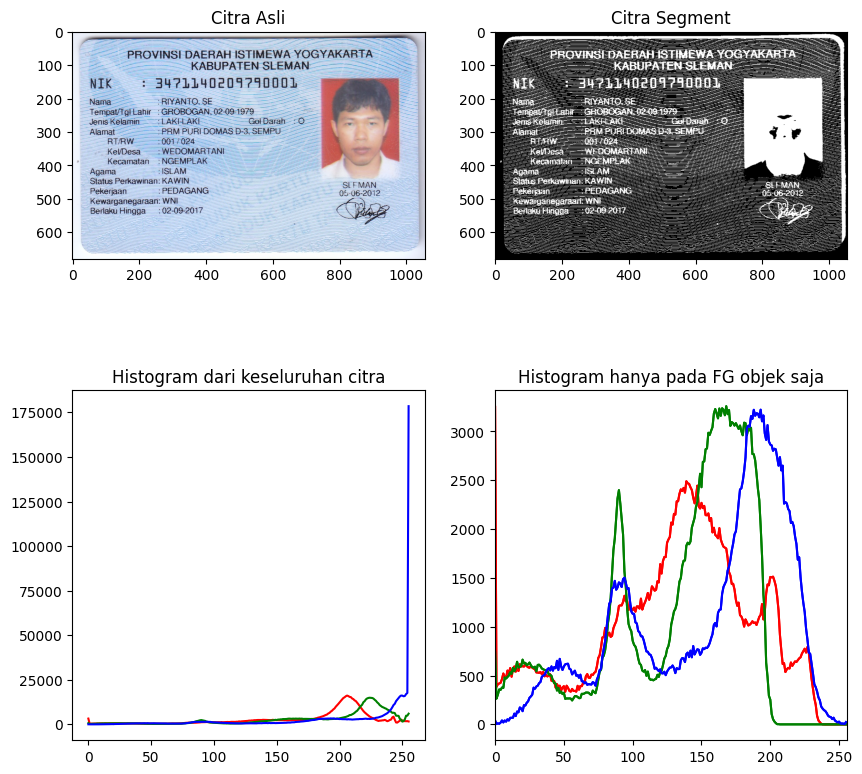

In [15]:
filename_3 = ('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 7/KTP_More/ktp.png')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image " **ktp Riyanto.jpg** ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

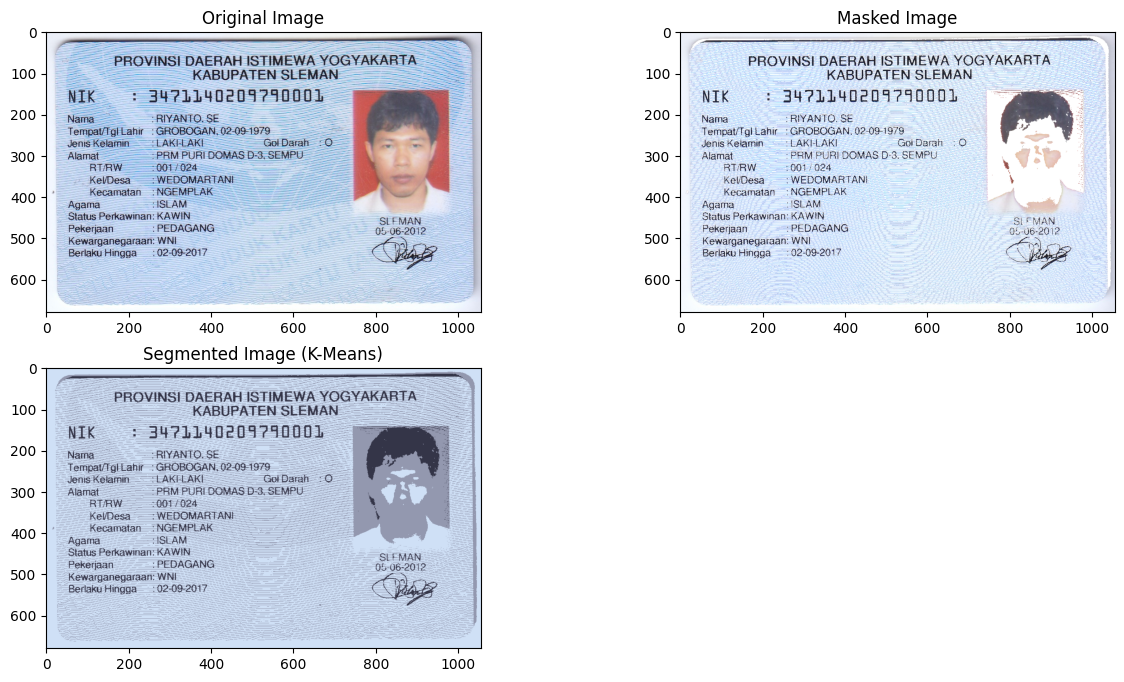

In [16]:
# Load the image
filename = ('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 7/KTP_More/ktp.png')
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

## **Tugas**

Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang
telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

### **Jawab**

#### **Import Library**

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os
import random
from sklearn.cluster import KMeans

#### **Global Thresholding KTP**

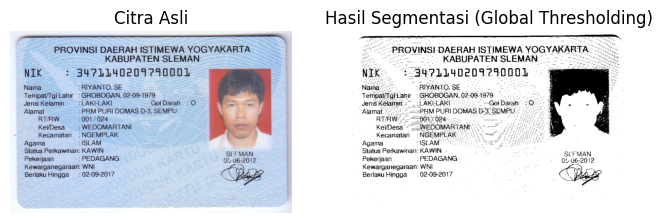

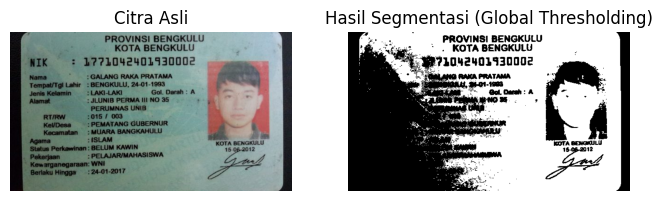

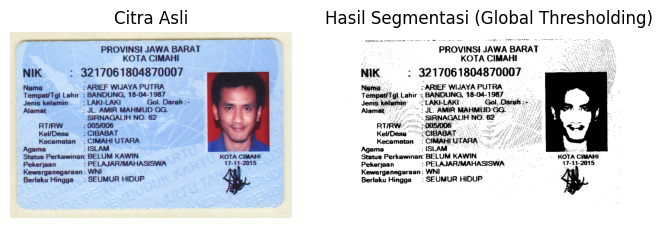

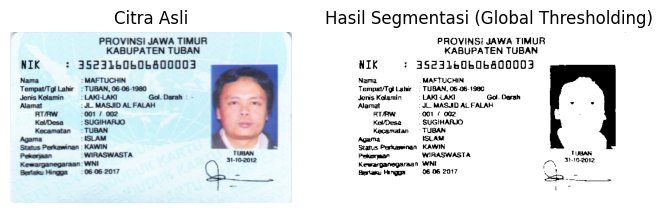

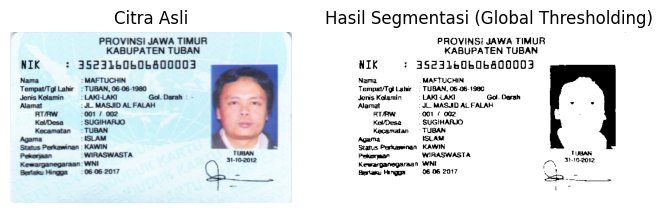

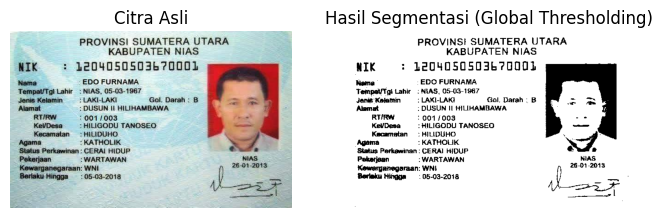

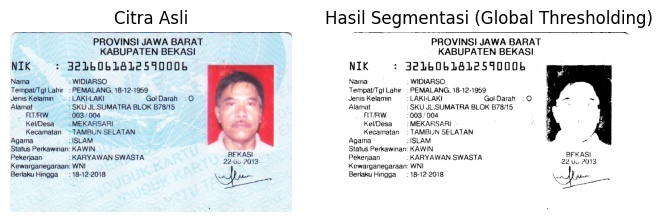

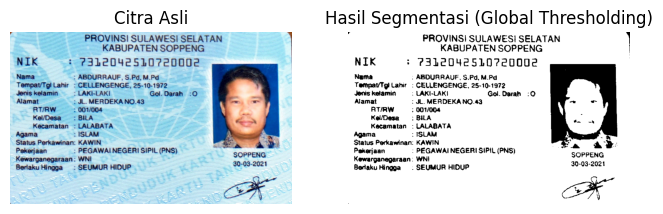

In [18]:
# Mengambil File dari variabel ktp
ktp = ('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 7/KTP_More')
image_files = [file for file in os.listdir(ktp) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp, img_file)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan global thresholding
    ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Hasil Segmentasi (Global Thresholding)')
    plt.axis('off')

    plt.show()

#### **Adaptive Thresholding KTP**

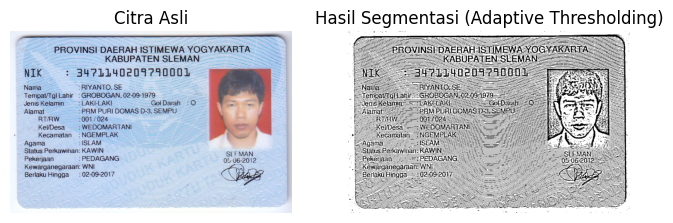

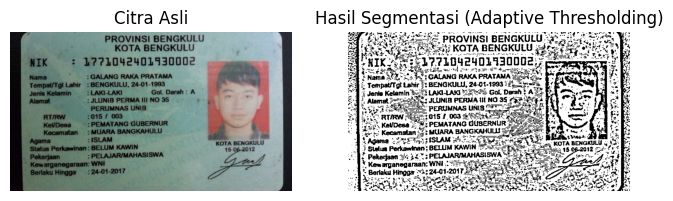

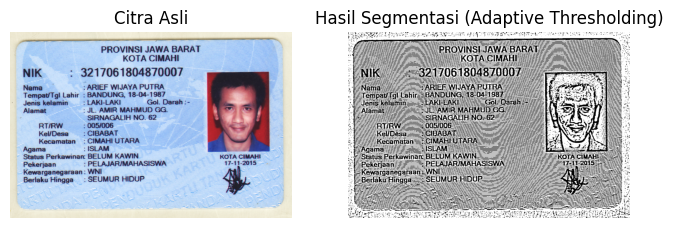

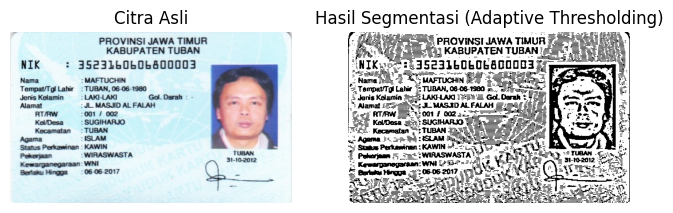

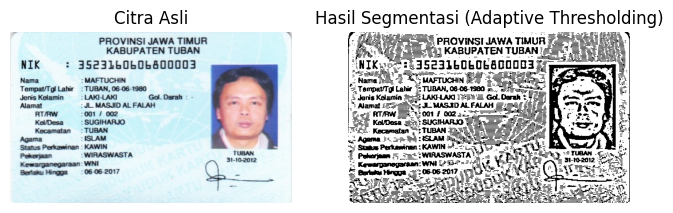

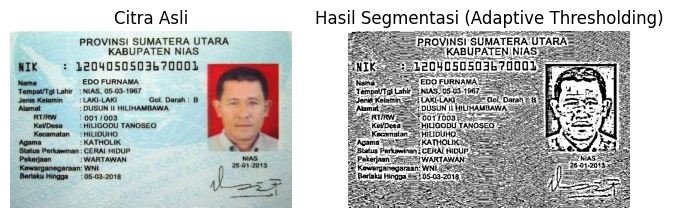

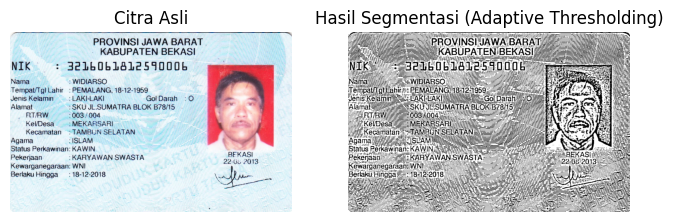

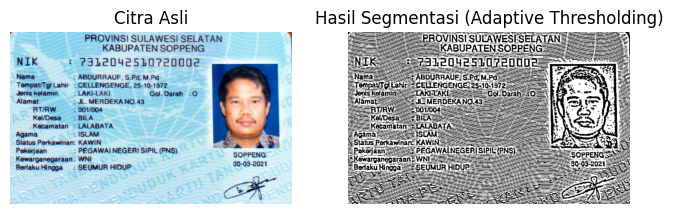

In [19]:
# Mengambil File dari variabel ktp
ktp = ('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 7/KTP_More')
image_files = [file for file in os.listdir(ktp) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp, img_file)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan adaptive thresholding
    thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Hasil Segmentasi (Adaptive Thresholding)')
    plt.axis('off')

    plt.show()

####**Outsu's Thresholding KTP**

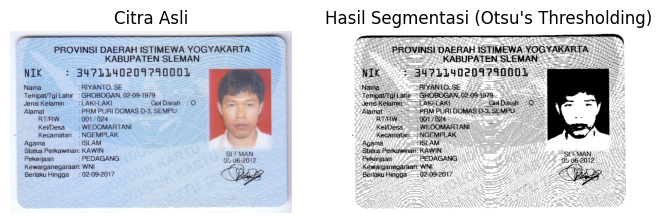

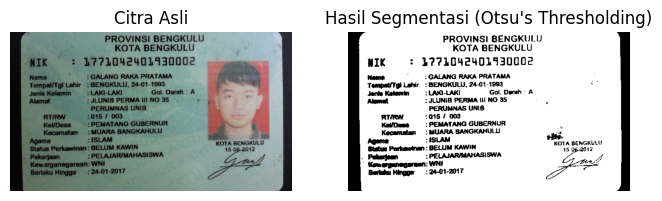

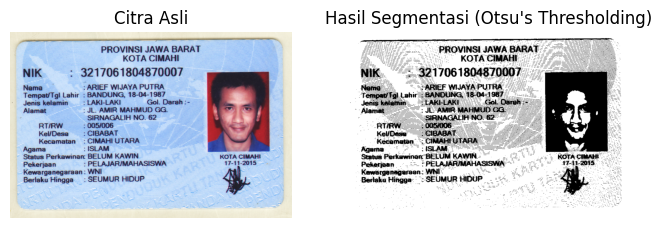

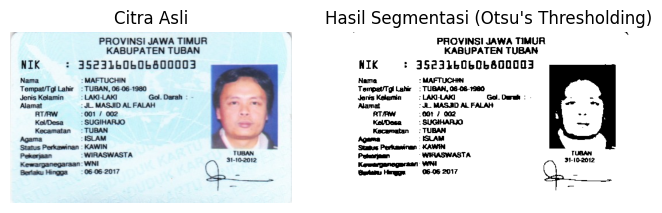

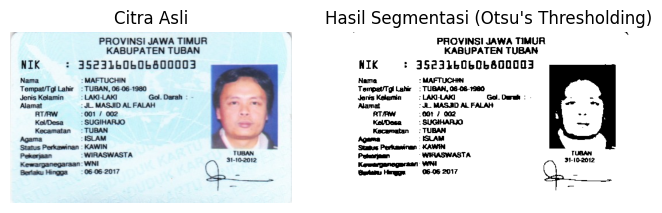

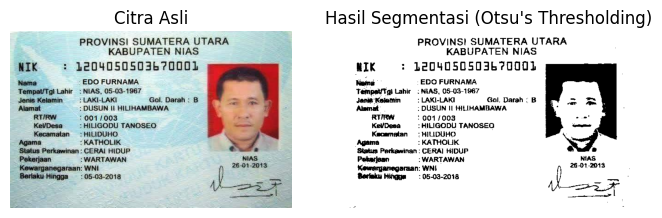

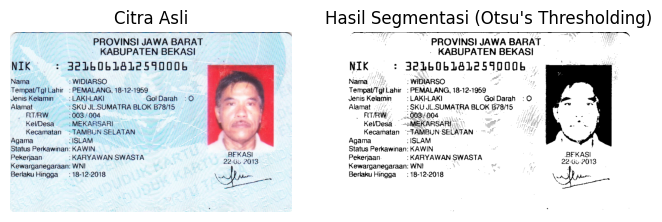

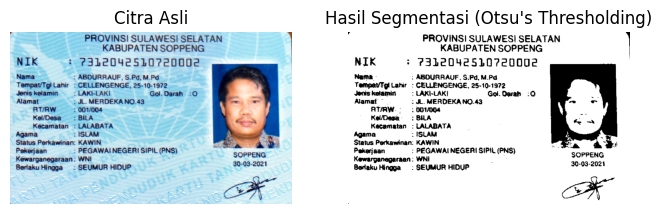

In [20]:
# Mengambil File dari variabel ktp
ktp = ('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 7/KTP_More')
image_files = [file for file in os.listdir(ktp) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp, img_file)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan Otsu's Thresholding
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Hasil Segmentasi (Otsu\'s Thresholding)')
    plt.axis('off')

    plt.show()